<a href="https://colab.research.google.com/github/ThitiwatJtrsn/multivariate/blob/main/Multivariate_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ให้นักศึกษาทำข้อสอบใน Colab Notebook นี้โดยกรอกข้อมูลของตัวเองใน cell ที่ 2 แล้วรัน cell ที่ 1 - 5 และเริ่มทำข้อสอบใน cell ที่ 6 เป็นต้นไป

โดยโจทย์คือ
1. ข้อมูลโจทย์ อยู่ใน ตัวแปร ```Data```
2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ
3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ
4. เปรียบเทียบความแตกต่างของผลข้อ 2. กับ ข้อ 3.
5. เขียน comments อธิบายทุกขั้นตอน
6. อัด video อธิบาย code ทุกๆขั้นตอนรวมถึงผลแล้วอัพลง youtube ในรูปแบบ unlist 
7. commit โดยใช้ชื่อ commit เป็น link youtube ที่อธิบาย code ในข้อ 6.

กำหนดส่งวันที่ 2 พฤษภาคม 2564 (โดยให้มากรอกวันที่ commit ครั้งสุดท้ายใน sheet: https://docs.google.com/spreadsheets/d/1_qJwLDJVtOW1HxBcf_FHVc6UT4J_SOonuR6o3EEnVzw/edit?usp=sharing ช่อง Final)

In [14]:
from sklearn.datasets import make_blobs
import random,math
import numpy as np
import pandas

In [15]:
Name = 'ฐิติวัฒน์ จันทรเสนา'
ID = '6230210475'

In [16]:
def DataGenerator(name,id):
    random.seed(int(id[3:6]))
    numfeat = random.randint(20,30)
    ct = random.randint(len(name)-6,len(name))
    
    X, y = make_blobs(n_samples=10000, centers=ct, n_features=numfeat , random_state=int(id[3:6]))

    print(f'{id[3:6]}:{numfeat}:{ct}')
    X_t = (X[:,1]*2)+int(id[3])
    X_t2 = (X[:,-1]*5)+int(id[4])

    DT = np.append(X,X_t.reshape([10000,1]),axis=1)
    DT = np.append(DT,X_t2.reshape([10000,1]),axis=1)
    
    return pandas.DataFrame(DT)

In [17]:
Data = DataGenerator(Name,ID)

021:22:16


In [18]:
Data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
0,1.039391,-2.387036,-3.497922,-5.328267,-8.678718,5.779481,4.693726,-9.039305,-6.856747,-3.051316,6.208178,-0.728674,-1.209568,-4.733171,0.827332,6.909030,10.460851,-7.759243,-0.127631,-9.629069,6.704932,3.139379,-4.774071,17.696893
1,-2.999958,-4.629015,-10.804170,7.985572,5.308159,8.399965,8.504110,-9.641025,5.591738,-8.668149,10.835163,4.685492,8.879597,6.214357,9.352480,4.336378,6.581569,-10.334358,2.683914,5.646710,6.793222,-11.571979,-9.258030,-55.859897
2,-2.283070,-3.935774,-8.418309,8.670313,9.549606,8.862807,8.557430,-9.420667,4.948781,-9.387406,9.019193,5.089031,8.126972,4.569491,8.980044,4.464475,6.643625,-11.016075,3.601535,8.752679,7.641445,-10.735928,-7.871548,-51.679641
3,-9.194473,-1.185524,-7.995901,-2.984028,7.249680,9.372627,-3.179537,-7.506007,7.405280,9.820167,-2.988439,-9.940277,-5.472871,7.402530,-9.224066,-3.228680,-4.187613,-6.418757,-7.754833,-10.555908,-7.064370,0.923576,-2.371048,6.617879
4,-9.444201,-1.702016,-9.139871,-5.528101,8.312870,9.514219,-3.243645,-8.603491,7.066946,10.185779,-2.530092,-10.427762,-7.104209,6.688527,-8.415212,-2.749131,-2.056412,-4.710402,-8.011179,-10.562339,-8.208584,0.777821,-3.404031,5.889103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8.570663,7.745031,3.332551,-0.131125,7.754660,5.628446,-9.137776,4.680007,2.081125,-0.116858,-2.020254,-1.964122,-5.301779,6.363146,4.393194,-5.639505,5.383566,4.412469,5.423917,-5.223493,-3.606812,-3.393692,15.490063,-14.968462
9996,-3.842826,7.761330,8.457160,5.945992,-1.103217,-7.615587,-3.665617,-5.104629,-3.402164,-1.193836,0.588533,-5.866029,4.177580,4.930785,9.306959,-5.063622,2.325805,1.291390,-1.833363,-2.649395,5.420599,1.574869,15.522659,9.874343
9997,-0.311583,-5.155992,-0.031352,-3.847010,-7.231104,5.254831,6.039680,-12.467927,-5.154640,-4.414190,4.902544,-1.413603,0.676148,-3.840611,3.680246,8.088712,8.842759,-10.749802,0.801560,-8.552788,8.095367,4.019561,-10.311985,22.097806
9998,-4.375030,6.055453,7.682048,6.146512,0.789055,-6.143570,-3.665225,-3.816322,-4.300116,0.127750,1.098119,-5.090588,7.040712,4.018777,7.543468,-4.984854,1.728996,1.402700,-0.007905,-2.044807,5.931352,1.403840,12.110906,9.019200


###**ตรวจสอบข้อมูลเพื่อหาค่า correlation**




In [19]:
Data.shape

(10000, 24)

In [20]:
corre = np.corrcoef(Data.to_numpy().T)
corre.shape

(24, 24)

In [21]:
corre

array([[ 1.00000000e+00,  1.13101835e-01,  1.77531012e-01,
         1.94229017e-01, -1.39104568e-01,  1.65174747e-01,
         1.13800123e-01,  3.37514876e-02, -1.30953421e-01,
        -2.88983020e-01, -3.14360746e-02, -1.79196584e-02,
         2.01185033e-01,  3.51387084e-02,  1.00653889e-01,
        -4.18370508e-01, -2.02611067e-02,  3.66913013e-02,
         3.67145849e-03, -4.02863184e-04, -8.66267737e-02,
        -1.12311910e-01,  1.13101835e-01, -1.12311910e-01],
       [ 1.13101835e-01,  1.00000000e+00,  3.00942925e-01,
         6.64372149e-02,  1.05209110e-01,  1.54355181e-02,
        -5.17501098e-01,  5.19843582e-01, -2.19093525e-01,
        -7.18749655e-02, -3.68956684e-01, -2.48010200e-01,
         2.06673584e-02, -5.14239086e-02,  2.40227823e-01,
        -4.34151303e-01, -8.89258761e-02,  5.66941795e-02,
        -1.01959900e-01,  1.94901290e-02, -2.43661928e-02,
         6.22622477e-02,  1.00000000e+00,  6.22622477e-02],
       [ 1.77531012e-01,  3.00942925e-01,  1.00000000e

In [22]:
for i in range(corre.shape[0]):
    for j in range(corre.shape[1]):
        if (i !=j) and (corre[i,j] == 1.):
            print(f'row = {i} column = {j} correcoef = {corre[i,j]}')#หาค่า correlation ที่ซ้ำกัน

row = 21 column = 23 correcoef = 1.0
row = 23 column = 21 correcoef = 1.0


##2. ทำ clustering แล้วทำ visualize ข้อมูลแบบ 2 มิติ




**import**

In [23]:
from sklearn.cluster import KMeans

**Define**

In [24]:
kmeans = KMeans(n_clusters=3, random_state=2021)

**Fit - Transform**

คำนวณหาจุด cluter centers ของข้อมูล data ด้วยวิธี K-means clustering

In [25]:
kmeans.fit(Data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=2021, tol=0.0001, verbose=0)

แสดง จุด cluster centers ที่คำนวณออกมาได้

In [26]:
kmeans.cluster_centers_

array([[-1.45416644e+00, -2.33256831e+00, -2.37218606e+00,
        -3.75939656e+00,  6.34403802e-01, -4.24590552e-01,
        -1.55402515e+00, -3.13433280e+00, -7.96638462e-01,
         1.28936509e+00, -1.59524422e+00, -9.20706994e-01,
        -1.56109702e+00, -1.21832160e+00, -1.86729368e+00,
         2.38958089e+00, -1.45083465e+00, -2.81663709e+00,
        -1.98101255e+00, -4.29501837e+00, -2.92631627e+00,
         4.07169801e+00, -4.66513662e+00,  2.23584900e+01],
       [ 2.89382702e+00,  2.71583405e+00,  1.23527685e+00,
         3.60658995e+00,  2.22954023e+00,  1.04811688e+00,
         1.47563237e+00,  5.02232615e-02, -2.37918880e+00,
        -1.84644303e+00, -2.56312205e+00, -1.24039103e+00,
         2.26024156e+00, -4.41117132e-01,  8.38377261e-01,
        -5.23318223e+00,  3.32953007e+00,  3.20848080e+00,
         8.46851134e-02,  7.71006193e-01,  4.61749805e-01,
         3.00954888e-02,  5.43166810e+00,  2.15047744e+00],
       [-1.06189270e+00, -4.15813703e+00, -1.25776729e

ทำสอบการจัดกลุ่มของ Data

In [27]:
y = kmeans.predict(Data)
y

array([0, 2, 2, ..., 0, 1, 1], dtype=int32)

ทำ PCA เพื่อลด dimension

ทำ PCA ข้อมูล Data แล้ว วาดกราฟ scatter plot โดยใส่สีตามผลการทำ kmeans clustering แล้วนำมาเทียบกับ กราฟ PCA - scatter ของข้อมูลจริง

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

new_pca = pca.fit_transform(Data)

In [29]:
from matplotlib import pyplot as plt

ของจริง

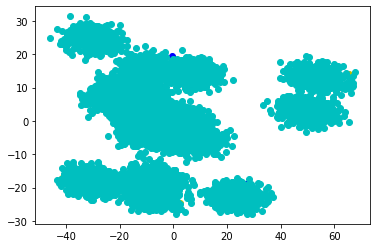

In [30]:
plt.plot(new_pca[:50,0],new_pca[:50,1],'oy')
plt.plot(new_pca[50:100,0],new_pca[50:100,1],'ob')
plt.plot(new_pca[100:,0],new_pca[100:,1],'oc')

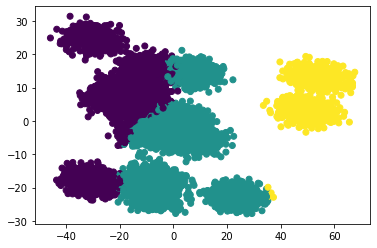

In [31]:
kmeans = KMeans(n_clusters=3, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

In [32]:
kmeans.cluster_centers_

array([[-1.45416644e+00, -2.33256831e+00, -2.37218606e+00,
        -3.75939656e+00,  6.34403802e-01, -4.24590552e-01,
        -1.55402515e+00, -3.13433280e+00, -7.96638462e-01,
         1.28936509e+00, -1.59524422e+00, -9.20706994e-01,
        -1.56109702e+00, -1.21832160e+00, -1.86729368e+00,
         2.38958089e+00, -1.45083465e+00, -2.81663709e+00,
        -1.98101255e+00, -4.29501837e+00, -2.92631627e+00,
         4.07169801e+00, -4.66513662e+00,  2.23584900e+01],
       [ 2.89382702e+00,  2.71583405e+00,  1.23527685e+00,
         3.60658995e+00,  2.22954023e+00,  1.04811688e+00,
         1.47563237e+00,  5.02232615e-02, -2.37918880e+00,
        -1.84644303e+00, -2.56312205e+00, -1.24039103e+00,
         2.26024156e+00, -4.41117132e-01,  8.38377261e-01,
        -5.23318223e+00,  3.32953007e+00,  3.20848080e+00,
         8.46851134e-02,  7.71006193e-01,  4.61749805e-01,
         3.00954888e-02,  5.43166810e+00,  2.15047744e+00],
       [-1.06189270e+00, -4.15813703e+00, -1.25776729e

ในกรณีที่เราใช้ค่า Default

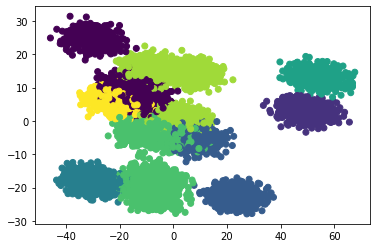

In [33]:
kmeans = KMeans(random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)

plt.scatter(new_pca[:,0],new_pca[:,1],c=y)

In [34]:
kmeans.cluster_centers_

array([[-2.85948735e+00, -4.87325277e+00, -5.97566922e+00,
        -5.17517341e-01,  8.04617973e+00,  8.39356118e-01,
        -1.00110097e+00, -4.73106633e+00,  3.32891575e+00,
         6.22381223e+00,  9.86448583e-02, -2.87812870e+00,
        -1.65170876e+00,  2.31487686e+00, -4.38840717e+00,
         9.27079352e-01, -5.64030895e+00, -3.28697926e+00,
        -4.41429977e+00, -3.32807147e+00, -4.58421637e+00,
         3.97059025e+00, -9.74650554e+00,  2.18529512e+01],
       [-1.20337136e-01, -4.51431767e+00,  6.24131922e+00,
        -3.23424896e+00, -6.09072172e+00, -3.16912334e+00,
         3.39099802e+00, -4.41127612e+00, -4.70484952e+00,
         7.63516033e+00,  8.03168286e-01,  4.90019774e+00,
         7.89477681e+00, -4.52592577e+00,  5.84201257e-01,
        -7.27946834e+00,  9.15341087e+00,  6.24224747e+00,
         3.03227025e+00, -5.87822947e+00,  9.40920695e+00,
        -9.25472757e+00, -9.02863534e+00, -4.42736379e+01],
       [ 8.85733419e+00,  3.30416706e+00,  5.20885447e

ค่า K ควรจะเป็นเท่าไหร่ มี 2 วิธี คือ
1. วิธี Elbow Method
2. วิธี Silhouette coefficient

**Elbow Method**

SSE

In [35]:
kmeans.inertia_ ## SSE (Sum of Squared Errors)

4108690.5643300726

In [36]:
SSE = list()
for k in [1,2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    SSE.append(kmeans.inertia_)

In [37]:
SSE

[13781913.857352642,
 9531047.93527796,
 7893793.770690319,
 6909815.866515603,
 5921999.64541768,
 5212367.236653116,
 4637506.289524077,
 4108690.5643300726]

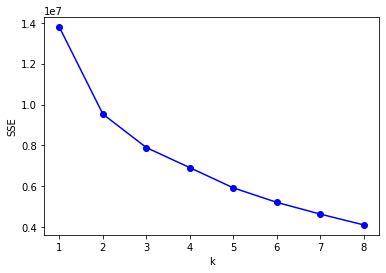

In [38]:
plt.plot([1,2,3,4,5,6,7,8],SSE,'o-b')

plt.xlabel('k')
plt.ylabel('SSE');

**Silhouette coefficient**

In [39]:
from sklearn import metrics

In [40]:
SilH = list()
for k in [2,3,4,5,6,7,8]:
    kmeans = KMeans(n_clusters=k, random_state=2021)
    kmeans.fit(Data)
    score = metrics.silhouette_score(Data,kmeans.labels_)
    SilH.append(score)

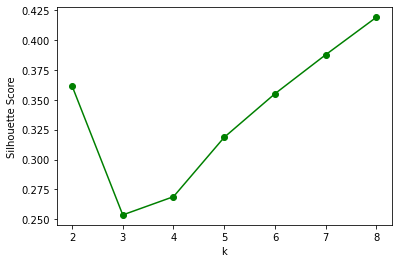

In [41]:
plt.plot([2,3,4,5,6,7,8],SilH,'o-g')
plt.xlabel('k')
plt.ylabel('Silhouette Score');

Text(0, 0.5, 'Y')

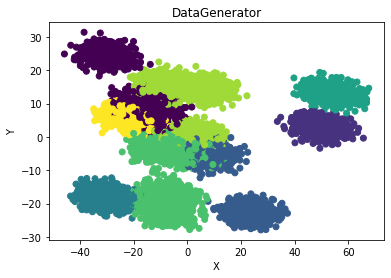

In [42]:
kmeans = KMeans(n_clusters= 8, random_state=2021)
kmeans.fit(Data)
y = kmeans.predict(Data)
plt.scatter(new_pca[:,0],new_pca[:,1],c=y)
plt.title('DataGenerator')
plt.xlabel('X')
plt.ylabel('Y')

In [43]:
kmeans.cluster_centers_

array([[-2.85948735e+00, -4.87325277e+00, -5.97566922e+00,
        -5.17517341e-01,  8.04617973e+00,  8.39356118e-01,
        -1.00110097e+00, -4.73106633e+00,  3.32891575e+00,
         6.22381223e+00,  9.86448583e-02, -2.87812870e+00,
        -1.65170876e+00,  2.31487686e+00, -4.38840717e+00,
         9.27079352e-01, -5.64030895e+00, -3.28697926e+00,
        -4.41429977e+00, -3.32807147e+00, -4.58421637e+00,
         3.97059025e+00, -9.74650554e+00,  2.18529512e+01],
       [-1.20337136e-01, -4.51431767e+00,  6.24131922e+00,
        -3.23424896e+00, -6.09072172e+00, -3.16912334e+00,
         3.39099802e+00, -4.41127612e+00, -4.70484952e+00,
         7.63516033e+00,  8.03168286e-01,  4.90019774e+00,
         7.89477681e+00, -4.52592577e+00,  5.84201257e-01,
        -7.27946834e+00,  9.15341087e+00,  6.24224747e+00,
         3.03227025e+00, -5.87822947e+00,  9.40920695e+00,
        -9.25472757e+00, -9.02863534e+00, -4.42736379e+01],
       [ 8.85733419e+00,  3.30416706e+00,  5.20885447e

##3. ลด Dimension ของข้อมูลเหลือ 2 มิติ แล้วทำ clustering แล้ว visualize ข้อมูลแบบ 2 มิติ

ข้อมูลมีจำนวนมาก ทำให้เกิดการทับซ้อน จึงจะทำการลด Dimension ด้วยวิธี MDS


###MDS

Import

In [44]:
from sklearn.manifold import MDS

Define

In [45]:
mds = MDS(n_components=2)

Fit-transform

In [ ]:
new_mds = mds.fit_transform(Data)

K-mean

In [ ]:
kmeans_2 = KMeans(n_clusters=4,random_state=2021)
kmeans_2.fit(Data)
g = kmeans_2.predict(Data)

In [ ]:
plt.scatter(new_mds[:,0],new_mds[:,1],c=g,alpha=0.5)
plt.title('DataGenerator') 
plt.xlabel('X') 
plt.ylabel('Y');